In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab_data

/content/drive/MyDrive/Colab_data


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Leer el archivo CSV
csv_file = pd.read_csv('/content/drive/MyDrive/Colab_data/Base_Indice_de_marginacion_municipal_9015.csv', index_col=0, encoding='latin-1')
years = [1990, 2016]

In [ ]:
# Eliminar columnas que no queremos
drop_colums = csv_file.drop(['CVE_MUN','POB_TOT','VP','ANALF','SPRIM','OVSDE','OVSEE','OVSAE','VHAC','OVPT','PL<5000','PO2SM','OVSD','OVSDSE','GM','IND0A100','LUG_NAC','LUGAR_EST'], axis=1)

In [ ]:
def convert_array_float(array):
  return [float(x) for x in array]

def clean_data_for_value_state(state):
  clean_up = drop_colums['ENT'] == state
  drop_ent = drop_colums[clean_up]
  return drop_ent.drop('ENT', axis=1)

def get_mean_im(data_csv):
  mean = {}
  
  for i in range(years[0], years[1]):
    data = data_csv[data_csv['AÑO'] == i]
    if len(data) >= 1:
      mean[i] = np.mean(convert_array_float(data['IM'].values))

  return mean

In [ ]:
# Filtrar datos por ENT que queremos para obtener sus MUN
new_csv = clean_data_for_value_state('Guanajuato')

In [ ]:
new_csv.sort_values('AÑO')

,MUN,IM,AÑO
CVE_ENT,,,
11,Santa Catarina,0.78,1990
11,Yuriria,-0.33,1990
11,San Luis de la Paz,0.07,1990
11,Doctor Mora,0.527,1990
11,San Francisco del Rincon,-1.004,1990
...,...,...,...
11,Apaseo el Grande,-0.803,2015
11,Cortazar,-0.967,2015
11,Xichu,0.677,2015


In [ ]:
for i in range(years[0], years[1]):
  data = new_csv[new_csv['AÑO'] == i]
  if len(data) >= 1:
    print(data)

                                                       MUN      IM   AÑO
CVE_ENT                                                                 
11                                                    Leon  -1.686  1990
11                                                Irapuato   -1.25  1990
11                                                  Celaya  -1.481  1990
11                                               Salamanca   -1.24  1990
11                                                 Penjamo  -0.328  1990
11                                       Valle de Santiago  -0.499  1990
11                                              Guanajuato  -1.169  1990
11                                                   Silao  -0.583  1990
11                                                Acambaro  -0.924  1990
11                                                 Allende   -0.22  1990
11        Dolores Hidalgo Cuna de la Independencia Naci...  -0.018  1990
11                                             Salv

In [ ]:
# Obtener la media de todos los municipios por año
data_mean = get_mean_im(new_csv)
data_mean

{1990: -0.2918478260869565,
 1995: -0.415695652173913,
 2000: -0.42149999999999993,
 2005: -0.40736956521739137,
 2010: -0.4303695652173914,
 2015: -0.5252608695652176}

In [ ]:
x = [key for key in data_mean.keys()]
y  = [value for value in data_mean.values()]

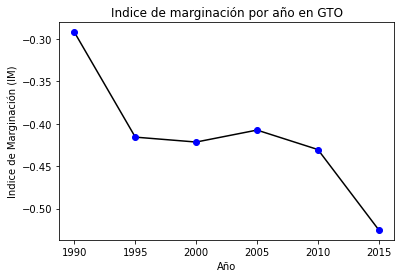

In [ ]:
plt.plot(x, y, color = 'black')
plt.plot(x, y, 'bo')
plt.title('Indice de marginación por año en GTO')
plt.xlabel('Año')
plt.ylabel('Indice de Marginación (IM)')
plt.show()

In [ ]:
x_1 = np.array(x).reshape(-1, 1)

In [ ]:
#Regresión lineal
model = LinearRegression()
model.fit(x_1, y)
R_sq = model.score(x_1, y)
print("R^2 = ", R_sq)
print("b = ", model.intercept_)
print("m = ", model.coef_)

R^2 =  0.7399463256258313
b =  13.281261904761923
m =  [-0.00683975]


In [ ]:
# Nuevos valores y de la regresión
y_predict = model.predict(x_1)
print("Valores de y en para la regresión lineal: ", y_predict)

Valores de y en para la regresión lineal:  [-0.32984369 -0.36404244 -0.3982412  -0.43243996 -0.46663872 -0.50083747]


In [ ]:
# Extrapolar para el año 2020
x_2020 = np.array([2020]).reshape(-1,1)
y_2020 = model.predict(x_2020)
print("IM predicho para 2020: ", y_2020)

IM predicho para 2020:  [-0.53503623]


In [ ]:
# Nuevas coordenadas para la gráfica
x_new = np.array(np.concatenate([x_1, x_2020]))
y_new = np.array(np.concatenate([y_predict, y_2020]))

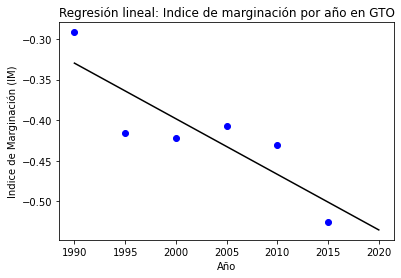

In [ ]:
# Graficar la regresión lineal
plt.plot(x_new, y_new, color = 'black')
plt.plot(x, y, 'bo')
plt.title('Regresión lineal: Indice de marginación por año en GTO')
plt.xlabel('Año')
plt.ylabel('Indice de Marginación (IM)')
plt.show()